In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False


# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [2]:
tel = pd.read_excel("data/Telco_customer_churn_status.xlsx", engine='openpyxl')

tel

,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,Q3,5,Stayed,No,0,45,5306,NaN,NaN
7039,6840-RESVB,1,Q3,3,Stayed,No,0,59,2140,NaN,NaN
7040,2234-XADUH,1,Q3,4,Stayed,No,0,71,5560,NaN,NaN
7041,4801-JZAZL,1,Q3,4,Stayed,No,0,59,2793,NaN,NaN


In [3]:
## 데이터프레임을 넣고 column별 특성 및 결측값, 고유값들을 확인하는 함수를 작성해본다.
## 필수는 아니지만 전체적인 흐름을 파악하기 쉬워진다.

def resumetable(df):
  print(f'데이터셋 크기: {df.shape}')                                # 데이터프레임의 전체 크기(행, 열) 출력

  summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])         # 각 피처의 데이터 타입을 가져와 데이터프레임으로 생성
  summary = summary.reset_index()                                    # 인덱스를 초기화하여 컬럼으로 변환
  summary = summary.rename(columns={'index':'피처'})                 # 'index' 컬럼명을 '피처'로 변경

  summary['결측값 개수'] = df.isnull().sum().values                 # 각 피처의 결측값(null) 개수 계산
  summary['고유값 개수'] = df.nunique().values                      # 각 피처의 고유값 개수 계산

  summary['첫 번째 값'] = df.loc[0].values                          # 각 피처의 첫 번째 샘플 값
  summary['두 번째 값'] = df.loc[1].values                          # 각 피처의 두 번째 샘플 값
  summary['세 번째 값'] = df.loc[2].values                          # 각 피처의 세 번째 샘플 값

  return summary                                                     # 요약 테이블 반환

In [4]:
resumetable(tel)

데이터셋 크기: (7043, 11)


,피처,데이터 타입,결측값 개수,고유값 개수,첫 번째 값,두 번째 값,세 번째 값
0,Customer ID,object,0,7043,8779-QRDMV,7495-OOKFY,1658-BYGOY
1,Count,int64,0,1,1,1,1
2,Quarter,object,0,1,Q3,Q3,Q3
3,Satisfaction Score,int64,0,5,3,3,2
4,Customer Status,object,0,3,Churned,Churned,Churned
5,Churn Label,object,0,2,Yes,Yes,Yes
6,Churn Value,int64,0,2,1,1,1
7,Churn Score,int64,0,81,91,69,81
8,CLTV,int64,0,3438,5433,5302,3179
9,Churn Category,object,5174,5,Competitor,Competitor,Competitor


In [5]:
tel = tel.rename(columns={
    'Customer ID': '고객ID',
    'Count': '카운트',
    'Quarter': '분기',
    'Satisfaction Score': '고객만족도점수',
    'Customer Status': '현재고객상태',
    'Churn Label': '이탈여부',
    'Churn Value': '이탈여부수치형',
    'Churn Score': '이탈위험점수',
    'CLTV': '고객생애가치',
    'Churn Category': '이탈유형',
    'Churn Reason': '이탈사유'
})

In [6]:
# 현재 이탈 여부 True:이탈
tel['이탈여부'] = tel['이탈여부'].replace({'Yes':True, 'No':False})

In [7]:
tel

,고객ID,카운트,분기,고객만족도점수,현재고객상태,이탈여부,이탈여부수치형,이탈위험점수,고객생애가치,이탈유형,이탈사유
0,8779-QRDMV,1,Q3,3,Churned,True,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Q3,3,Churned,True,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,1,Q3,2,Churned,True,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Q3,2,Churned,True,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Q3,2,Churned,True,1,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,Q3,5,Stayed,False,0,45,5306,NaN,NaN
7039,6840-RESVB,1,Q3,3,Stayed,False,0,59,2140,NaN,NaN
7040,2234-XADUH,1,Q3,4,Stayed,False,0,71,5560,NaN,NaN
7041,4801-JZAZL,1,Q3,4,Stayed,False,0,59,2793,NaN,NaN


In [8]:
tel['이탈사유'] = tel['이탈사유'].replace("", pd.NA)

In [9]:
tel['이탈사유']

0       Competitor offered more data
1       Competitor made better offer
2       Competitor made better offer
3          Limited range of services
4                 Extra data charges
                    ...             
7038                             NaN
7039                             NaN
7040                             NaN
7041                             NaN
7042                             NaN
Name: 이탈사유, Length: 7043, dtype: object

In [10]:
tel.head(500)

,고객ID,카운트,분기,고객만족도점수,현재고객상태,이탈여부,이탈여부수치형,이탈위험점수,고객생애가치,이탈유형,이탈사유
0,8779-QRDMV,1,Q3,3,Churned,True,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Q3,3,Churned,True,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,1,Q3,2,Churned,True,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Q3,2,Churned,True,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Q3,2,Churned,True,1,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...
495,5046-NUHWD,1,Q3,3,Stayed,False,0,50,3094,NaN,NaN
496,7529-ZDFXI,1,Q3,5,Stayed,False,0,36,4429,NaN,NaN
497,3197-ARFOY,1,Q3,3,Stayed,False,0,59,3524,NaN,NaN
498,4716-HHKQH,1,Q3,3,Stayed,False,0,65,5328,NaN,NaN


In [11]:
tel = tel.drop(["카운트", "이탈여부수치형"], axis=1)


In [12]:
tel

,고객ID,분기,고객만족도점수,현재고객상태,이탈여부,이탈위험점수,고객생애가치,이탈유형,이탈사유
0,8779-QRDMV,Q3,3,Churned,True,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Q3,3,Churned,True,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Q3,2,Churned,True,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Q3,2,Churned,True,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Q3,2,Churned,True,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Q3,5,Stayed,False,45,5306,NaN,NaN
7039,6840-RESVB,Q3,3,Stayed,False,59,2140,NaN,NaN
7040,2234-XADUH,Q3,4,Stayed,False,71,5560,NaN,NaN
7041,4801-JZAZL,Q3,4,Stayed,False,59,2793,NaN,NaN


In [13]:
tel.to_csv("churn_status_preprocessing.csv", index=False, encoding="utf-8-sig", na_rep="NULL")


In [16]:
# tel2 = tel_data.csv
tel2 = pd.read_csv("data/tel_data(전처리).csv")

In [17]:
tel_merged = pd.merge(tel, tel2, on="고객ID", how="inner")

In [18]:
tel_merged

,고객ID,분기,고객만족도점수,현재고객상태,이탈여부_x,이탈위험점수,고객생애가치,이탈유형,이탈사유,성별,...,TV스트리밍이용여부,영화스트리밍이용여부,계약기간유형,전자청구서이용여부,결제방법,월요금,총요금,이탈여부_y,인터넷서비스가입여부,개월수*월요금
0,8779-QRDMV,Q3,3,Churned,True,91,5433,Competitor,Competitor offered more data,True,...,False,True,Month-to-month,True,Electronic check,39.65,39.65,True,True,39.65
1,7495-OOKFY,Q3,3,Churned,True,69,5302,Competitor,Competitor made better offer,False,...,False,False,Month-to-month,True,Credit card (automatic),80.65,633.30,True,True,645.20
2,1658-BYGOY,Q3,2,Churned,True,81,3179,Competitor,Competitor made better offer,True,...,True,True,Month-to-month,True,Electronic check,95.45,1752.55,True,True,1718.10
3,4598-XLKNJ,Q3,2,Churned,True,88,5337,Dissatisfaction,Limited range of services,False,...,True,True,Month-to-month,True,Electronic check,98.50,2514.50,True,True,2462.50
4,4846-WHAFZ,Q3,2,Churned,True,67,2793,Price,Extra data charges,False,...,False,False,Month-to-month,True,Electronic check,76.50,2868.15,True,True,2830.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Q3,5,Stayed,False,45,5306,NaN,NaN,False,...,False,False,Two year,True,Bank transfer (automatic),21.15,1419.40,False,False,1522.80
7039,6840-RESVB,Q3,3,Stayed,False,59,2140,NaN,NaN,True,...,True,True,One year,True,Mailed check,84.80,1990.50,False,True,2035.20
7040,2234-XADUH,Q3,4,Stayed,False,71,5560,NaN,NaN,False,...,True,True,One year,True,Credit card (automatic),103.20,7362.90,False,True,7430.40
7041,4801-JZAZL,Q3,4,Stayed,False,59,2793,NaN,NaN,False,...,False,False,Month-to-month,True,Electronic check,29.60,346.45,False,True,325.60


In [19]:
tel_merged.to_csv("test.csv", index=False, encoding="utf-8-sig", na_rep="NULL")

In [20]:
tel_merged = tel_merged.rename(columns={
    '이탈여부_x': '이탈여부',
})

In [21]:
numeric_df = tel.select_dtypes(include=['number', 'bool'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

          고객만족도점수      이탈여부    이탈위험점수    고객생애가치
고객만족도점수  1.000000 -0.754649 -0.495144  0.075811
이탈여부    -0.754649  1.000000  0.660772 -0.127463
이탈위험점수  -0.495144  0.660772  1.000000 -0.079232
고객생애가치   0.075811 -0.127463 -0.079232  1.000000


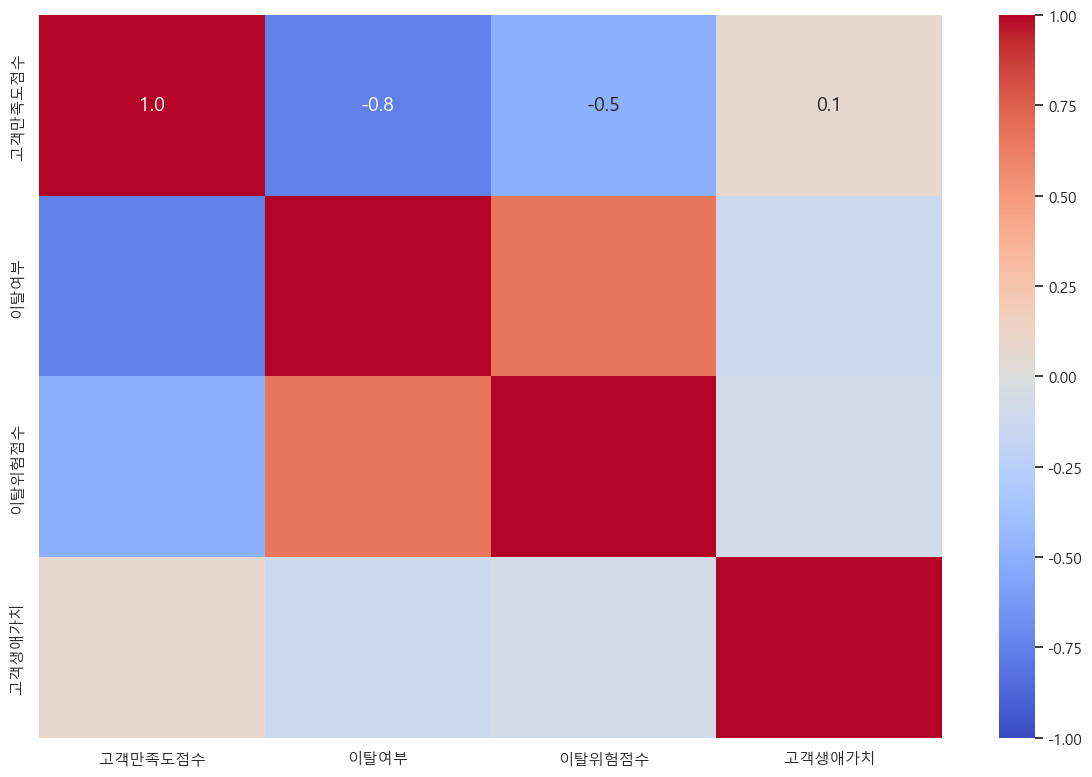

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=False, vmin=-1, vmax=1)
plt.tight_layout()
plt.show()

In [24]:
df1 = pd.read_csv("data/churn_status_preprocessing.csv")
df2 = pd.read_csv("data/tel_data(전처리).csv")

In [25]:
merged_df = pd.merge(
    df1,
    df2,
    on='고객ID',
    how='inner',
    suffixes=('', '_dup')
)
# 중복된 쪽('_dup')을 삭제
merged_df = merged_df.drop(columns=['이탈여부_dup'])


In [32]:
numeric_df = merged_df.select_dtypes(include=["int64", "float64","bool"])

In [33]:
correlation_matrix = numeric_df.corr()

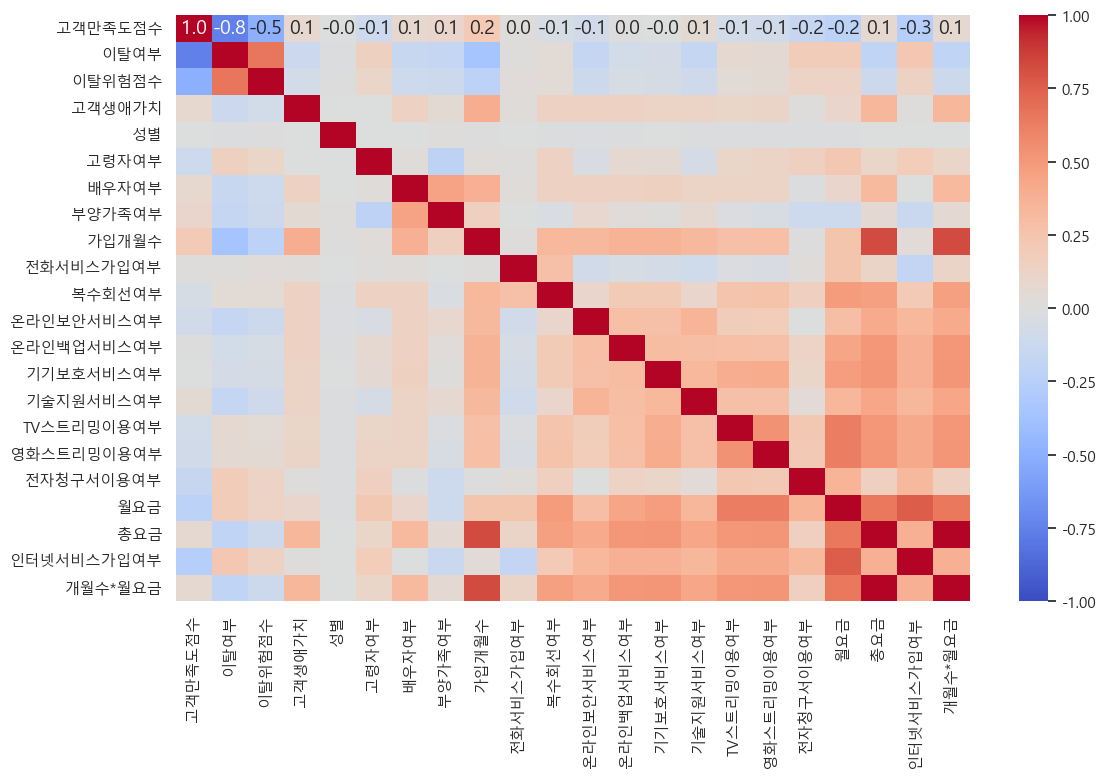

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=False, vmin=-1, vmax=1)
plt.tight_layout()
plt.show() 

In [30]:
print(merged_df['현재고객상태'].unique())
print(merged_df['현재고객상태'].value_counts())


['Churned' 'Stayed' 'Joined']
현재고객상태
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64


In [ ]:
# print(sns.__version__)
# !pip show matplotlib

In [43]:
# 1) 숫자형 부분(가입개월수~총요금) 추출 & 정렬
test1 = tel_merged[['가입개월수', '월요금', '개월수*월요금', '총요금']]
test2 = tel_merged.sort_values(by='가입개월수', ascending=True)

In [44]:
# 3) 현재고객상태 더미
state_dummies = pd.get_dummies(tel['현재고객상태'], prefix='현재고객상태')

In [45]:
# 4) 이탈여부 숫자형
churn_num = tel['이탈여부'].astype(int)

In [46]:
# 5) 합치기 & 숫자형만 필터링
df_for_corr = pd.concat([test2, state_dummies, churn_num], axis=1) \
                .select_dtypes(include=['number'])

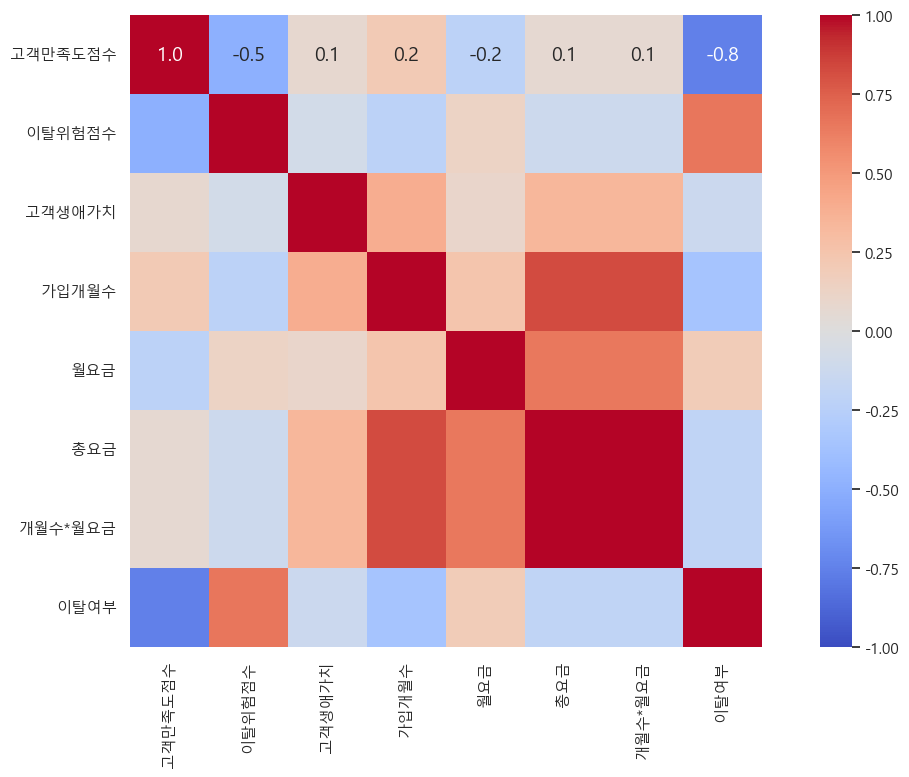

In [47]:
# 6) 상관행렬 & 히트맵
correlation_matrix = df_for_corr.corr()
plt.figure(figsize=(12,8))
sns.heatmap(
    correlation_matrix,
    annot=True, fmt=".1f",
    cmap='coolwarm', square=True,
    vmin=-1, vmax=1
)
plt.tight_layout()
plt.show()

['가입개월수', '월요금', '총요금', '개월수*월요금', '현재고객상태_Churned', '현재고객상태_Joined', '현재고객상태_Stayed', '이탈여부']


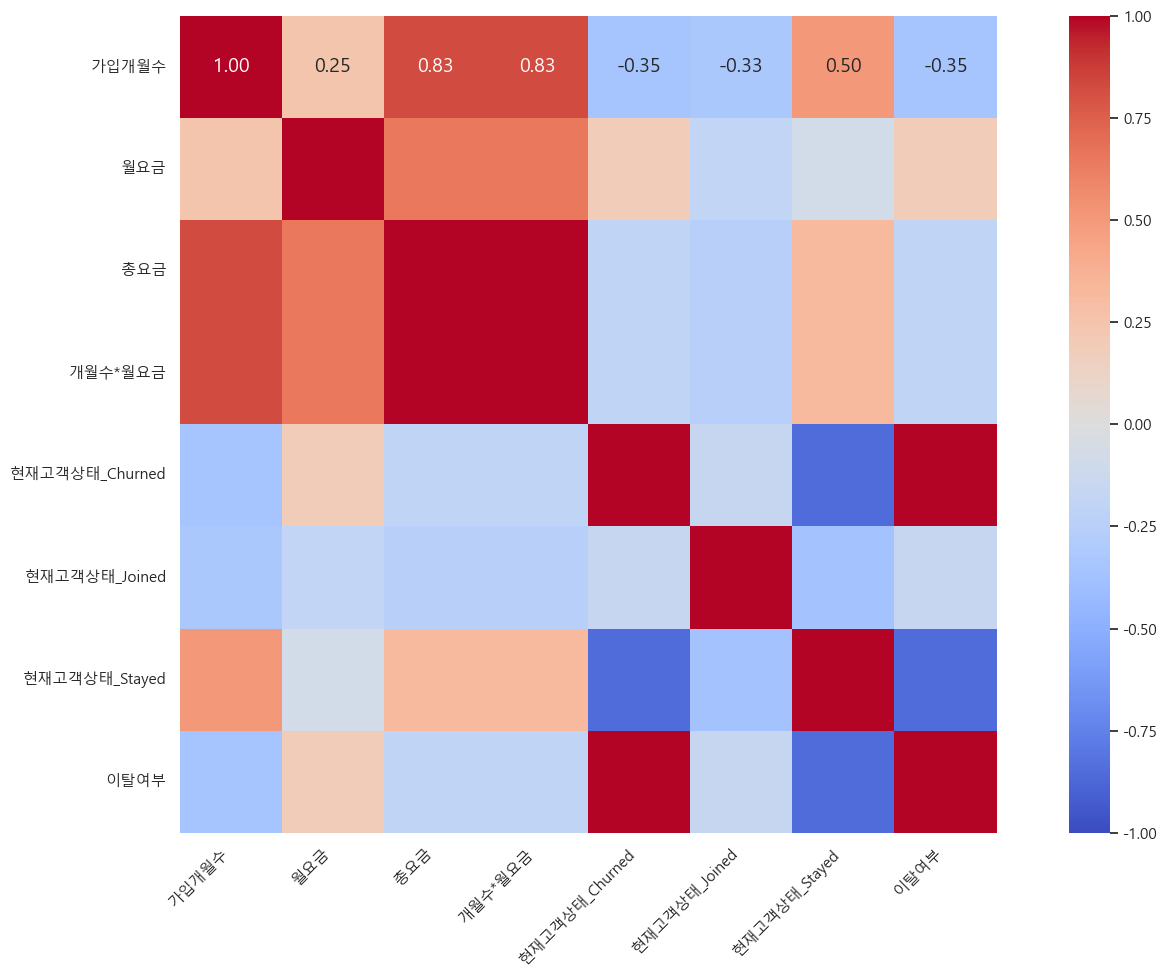

In [50]:
# — (2) 숫자형 피처(가입·요금 계열) 추출  
num_df = tel_merged[['가입개월수','월요금','총요금','개월수*월요금']]

# — (3) “현재고객상태” 원-핫 인코딩  
state_dummies = pd.get_dummies(
    tel['현재고객상태'], 
    prefix='현재고객상태'
)

# — (4) 이탈여부를 0/1 숫자로 변환  
churn_num = tel_merged['이탈여부'].astype(int).rename('이탈여부')

# — (5) 상관분석용 DataFrame 합치기  
df_for_corr = pd.concat([ num_df, state_dummies, churn_num ], axis=1)

# — (6) 포함된 컬럼 확인 (여기서 더미들이 보이는지 꼭 확인!)  
print(df_for_corr.columns.tolist())

# — (7) 상관행렬 계산  
correlation_matrix = df_for_corr.corr()

# — (8) 히트맵 그리기  
plt.figure(figsize=(15, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    vmin=-1, vmax=1,
    mask=None
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()